In [ ]:
# Para o estudo do bloco na rampa, vamos avaliar 4 experimentos em condições diferentes com o ângulo de inclinação
# aproximadamente igual, sinθ ~= 0.25, logo θ = 0.252680255 rad, ou seja, cosθ ~= 0.968245837
# O movimento que queremos modelar é causado pela força peso do objeto contra a força do atrito descrita pelas fórmula
# F = m*a = Px - Fat = P*sinθ - μ*N
# Sendo a normal a componente vertical do peso Py = P*cosθ e o coeficiente de atrito(μ) possui 2 estados, o estático e o dinâmico
# sendo o estático(μe) usado enquanto o deslocamento não começa e o dinâmico(μd) usado quando o deslocamento do corpo já começou
# Logo F = m*g*sinθ - μ*m*g*cosθ = m*a
# Com a = g*sinθ - μd*g*cosθ enquanto o movimento ocorre, lembrando que a = Δv/t e v = Δs/t
# No experimento são usados os seguintes valores para massa: sem sobrepeso(m) m = 380,7g e com sobrepeso(m_sp) m_sp = 781,0g
# Na modelagem vamos usar g = 9.81 m/s² = 981 cm/s²

In [55]:
from math import sin, cos

def modelagem(s0, t0, tf, theta, mi):
    # s0 e t0 são o espaço e tempo iniciais respectivamente,
    # tf o tempo final, theta o ângulo de inclinação da rampa
    # e mi o coeficiente de atrito dinâmico
    s = [s0]
    t = [t0]
    dt = (tf-t0)/50
    v = [0]
    g = 981
    a = g*sin(theta) - mi*g*cos(theta)
    for i in range(0, 50):
        t.append(t[i] + dt)
        v.append(v[i] + a*dt)
        s.append(s[i] + v[i+1]*dt)
    return {
        "tempo": t,
        "velocidade": v,
        "espaço": s
    }

def modelagemEspecifica(s0, t, theta, mi):
    s = [s0]
    v = [0]
    g = 981
    a = g*sin(theta) - mi*g*cos(theta)
    for i in range(1, len(t)):
        v.append(v[i-1] + a*(t[i] - t[i-1]))
        s.append(s[i-1] + v[i]*(t[i] - t[i-1]))
    return {
        "velocidade": v,
        "espaço": s,
        "aceleração": a
    }

In [56]:
# Experimento 1: bloco de aço, superfície de madeira AM4
# Fonte: http://www.fep.if.usp.br/~fisfoto/translacao/atrito/situacoes/atritoAM4.php

tempoAM = [11.912, 11.945, 11.976, 12.012, 12.045, 12.079, 12.112, 12.145, 12.179, 12.212, 12.246, 12.279, 12.312]
posicaoAM = [18.3, 18.3, 18.4, 18.7, 19.0, 19.3, 19.8, 20.4, 21.0, 21.7, 22.5, 23.4, 24.6]

print(modelagemEspecifica(posicaoAM[0], tempoAM, 0.252680255, 0.1766))

{'velocidade': [0, 2.5577190277254176, 4.960424781043318, 7.75066372038015, 10.308382748105567, 12.94360841303488, 15.501327440760297, 18.059046468485715, 20.69427213341503, 23.25199116114045, 25.887216826069764, 28.444935853795183, 31.002654881520602], 'espaço': [18.3, 18.384404727914937, 18.538177896127284, 18.817201790060967, 19.157378420748444, 19.597461106791638, 20.10900491233672, 20.704953445796736, 21.40855869833286, 22.175874406650482, 23.056039778736874, 23.9947226619121, 25.01781027300226], 'aceleração': 77.50663720380177}


In [57]:
# Experimento 2: bloco de aço, superfície de vidro, com sobrepeso AVS1
# Fonte: http://www.fep.if.usp.br/~fisfoto/translacao/atrito/situacoes/atritoAVS1.php

tempoAVS = [0.067, 0.100, 0.133, 0.167, 0.200, 0.234, 0.267, 0.300, 0.334, 0.400, 0.434, 0.467, 0.500, 0.534]
posicaoAVS = [20.1, 20.1, 20.2, 20.3, 20.5, 20.7, 21.1, 21.5, 22.0, 23.2, 24.0, 24.8, 25.6, 26.6]

print(modelagemEspecifica(posicaoAVS[0], tempoAVS, 0.252680255, 0.1965))

{'velocidade': [0, 1.9339530806153824, 3.867906161230765, 5.860463880652674, 7.794416961268056, 9.786974680689966, 11.720927761305347, 13.654880841920729, 15.64743856134264, 19.515344722573403, 21.50790244199531, 23.441855522610695, 25.375808603226076, 27.368366322647987], 'espaço': [20.1, 20.16382045166031, 20.291461354980925, 20.490717126923116, 20.74793288664496, 21.08069002578842, 21.467480641911497, 21.91809170969488, 22.450104620780532, 23.738117372470377, 24.469386055498216, 25.24296728774437, 26.08036897165083, 27.010893426620864], 'aceleração': 58.60463880652674}


In [58]:
# Experimento 3: bloco de aço, superfície de vidro, área de contato grande AVG1
# Fonte: http://www.fep.if.usp.br/~fisfoto/translacao/atrito/situacoes/atritoAVG1.php

tempoAVG = [0.334, 0.367, 0.400, 0.434, 0.467, 0.534, 0.567, 0.601, 0.634, 0.667, 0.701, 0.734, 0.767]
posicaoAVG = [20.8, 20.8, 20.9, 21.0, 21.3, 22.1, 22.8, 23.6, 24.5, 25.7, 27.0, 28.4, 30.0]

print(modelagemEspecifica(posicaoAVG[0], tempoAVG, 0.252680255, 0.158))

{'velocidade': [0, 3.1407364456273372, 6.28147289125468, 9.517383168567694, 12.658119614195037, 19.034766337135395, 22.175502782762727, 25.411413060075745, 28.55214950570309, 31.69288595133043, 34.92879622864344, 38.06953267427078, 41.21026911989812], 'espaço': [20.8, 20.903644302705704, 21.110932908117107, 21.434523935848407, 21.852241883116843, 23.127571227704916, 23.859362819536084, 24.72335086357866, 25.66557179726686, 26.711437033660765, 27.89901610543464, 29.155310683685578, 30.515249564642218], 'aceleração': 95.17383168567696}


In [62]:
# Experimento 4: bloco de aço, superfície de vidro, área de contato pequena AVP1
# Fonte: http://www.fep.if.usp.br/~fisfoto/translacao/atrito/situacoes/atritoAVP1.php

tempoAVP = [0.067, 0.100, 0.133, 0.167, 0.200, 0.234, 0.267, 0.300, 0.334, 0.367, 0.400, 0.434, 0.467, 0.534, 0.567, 0.601]
posicaoAVP = [20.7, 20.7, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.4, 21.7, 22.1, 22.5, 23.0, 24.2, 25.0, 25.9]

print(modelagemEspecifica(posicaoAVP[0], tempoAVP, 0.252680255, 0.221))

{'velocidade': [0, 1.166000030153227, 2.332000060306454, 3.5333334247067487, 4.699333454859976, 5.9006668192602705, 7.066666849413497, 8.232666879566723, 9.434000243967018, 10.600000274120244, 11.766000304273472, 12.967333668673765, 14.133333698826993, 16.500667093380514, 17.66666712353374, 18.868000487934033], 'espaço': [20.7, 20.738478000995055, 20.815434002985167, 20.935567339425198, 21.09064534343558, 21.291268015290427, 21.524468021321074, 21.796146028346776, 22.116902036641655, 22.466702045687622, 22.854980055728646, 23.295869400463555, 23.762269412524848, 24.867814107781342, 25.450814122857953, 26.09232613944771], 'aceleração': 35.333334247067484}


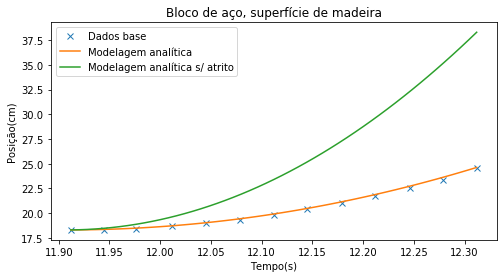

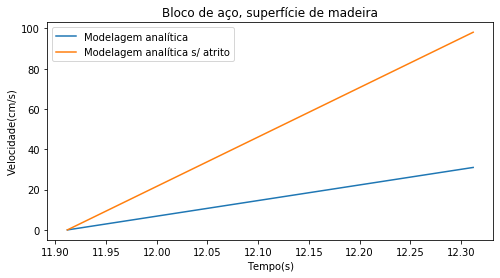

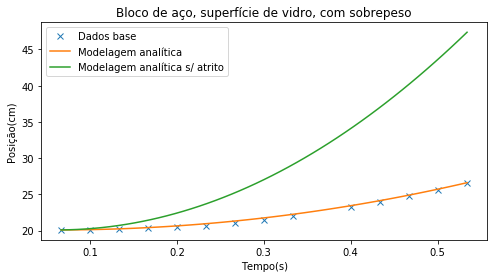

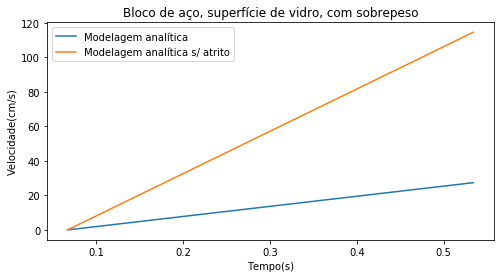

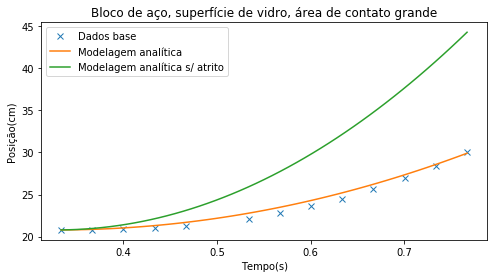

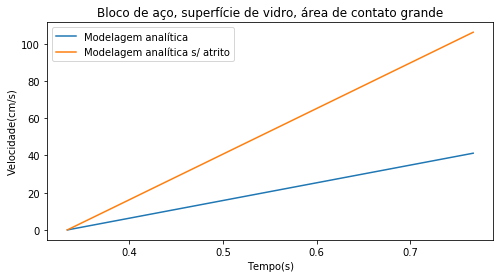

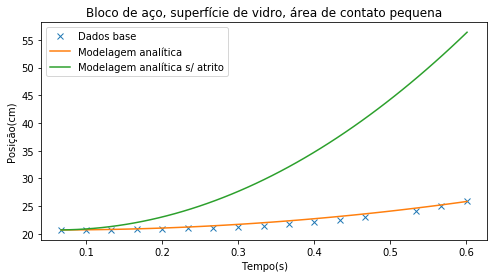

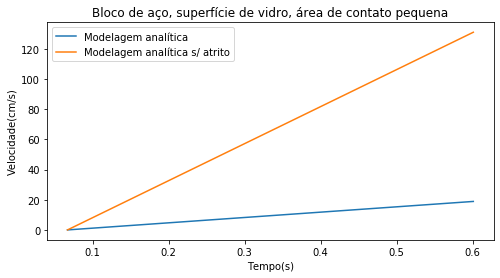

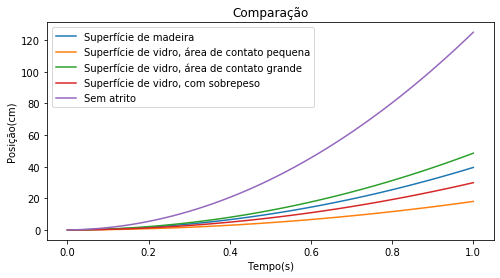

In [63]:
import matplotlib.pyplot as plt

fig, am = plt.subplots(1, figsize=(8, 4))
am.set_title('Bloco de aço, superfície de madeira')
am.set_xlabel('Tempo(s)')
am.set_ylabel('Posição(cm)')
am.plot(tempoAM, posicaoAM, label='Dados base', marker='x', linestyle='')
modAM = modelagem(18.3, 11.912, 12.312, 0.252680255, 0.1766)
am.plot(modAM["tempo"], modAM["espaço"], label='Modelagem analítica')
modAMsA = modelagem(18.3, 11.912, 12.312, 0.252680255, 0)
am.plot(modAMsA["tempo"], modAMsA["espaço"], label='Modelagem analítica s/ atrito')
am.legend()

fig, vam = plt.subplots(1, figsize=(8, 4))
vam.set_title('Bloco de aço, superfície de madeira')
vam.set_xlabel('Tempo(s)')
vam.set_ylabel('Velocidade(cm/s)')
vam.plot(modAM["tempo"], modAM["velocidade"], label='Modelagem analítica')
vam.plot(modAMsA["tempo"], modAMsA["velocidade"], label='Modelagem analítica s/ atrito')
vam.legend()

fig, avs = plt.subplots(1, figsize=(8, 4))
avs.set_title('Bloco de aço, superfície de vidro, com sobrepeso')
avs.set_xlabel('Tempo(s)')
avs.set_ylabel('Posição(cm)')
avs.plot(tempoAVS, posicaoAVS, marker='x', linestyle='', label='Dados base')
modAVS = modelagem(20.1, 0.067, 0.534, 0.252680255, 0.1965)
avs.plot(modAVS["tempo"], modAVS["espaço"], label='Modelagem analítica')
modAVSsA = modelagem(20.1, 0.067, 0.534, 0.252680255, 0)
avs.plot(modAVSsA["tempo"], modAVSsA["espaço"], label='Modelagem analítica s/ atrito')
avs.legend()

fig, vavs = plt.subplots(1, figsize=(8, 4))
vavs.set_title('Bloco de aço, superfície de vidro, com sobrepeso')
vavs.set_xlabel('Tempo(s)')
vavs.set_ylabel('Velocidade(cm/s)')
vavs.plot(modAVS["tempo"], modAVS["velocidade"], label='Modelagem analítica')
vavs.plot(modAVSsA["tempo"], modAVSsA["velocidade"], label='Modelagem analítica s/ atrito')
vavs.legend()

fig, avg = plt.subplots(1, figsize=(8, 4))
avg.set_title('Bloco de aço, superfície de vidro, área de contato grande')
avg.set_xlabel('Tempo(s)')
avg.set_ylabel('Posição(cm)')
avg.plot(tempoAVG, posicaoAVG, marker='x', linestyle='', label='Dados base')
modAVG = modelagem(20.8, 0.334, 0.767, 0.252680255, 0.158)
avg.plot(modAVG["tempo"], modAVG["espaço"], label='Modelagem analítica')
modAVGsA = modelagem(20.8, 0.334, 0.767, 0.252680255, 0)
avg.plot(modAVGsA["tempo"], modAVGsA["espaço"], label='Modelagem analítica s/ atrito')
avg.legend()

fig, vavg = plt.subplots(1, figsize=(8, 4))
vavg.set_title('Bloco de aço, superfície de vidro, área de contato grande')
vavg.set_xlabel('Tempo(s)')
vavg.set_ylabel('Velocidade(cm/s)')
vavg.plot(modAVG["tempo"], modAVG["velocidade"], label='Modelagem analítica')
vavg.plot(modAVGsA["tempo"], modAVGsA["velocidade"], label='Modelagem analítica s/ atrito')
vavg.legend()

fig, avp = plt.subplots(1, figsize=(8, 4))
avp.set_title('Bloco de aço, superfície de vidro, área de contato pequena')
avp.set_xlabel('Tempo(s)')
avp.set_ylabel('Posição(cm)')
avp.plot(tempoAVP, posicaoAVP, marker='x', linestyle='', label='Dados base')
modAVP = modelagem(20.7, 0.067, 0.601, 0.252680255, 0.221)
avp.plot(modAVP["tempo"], modAVP["espaço"], label='Modelagem analítica')
modAVPsA = modelagem(20.7, 0.067, 0.601, 0.252680255, 0)
avp.plot(modAVPsA["tempo"], modAVPsA["espaço"], label='Modelagem analítica s/ atrito')
avp.legend()

fig, vavp = plt.subplots(1, figsize=(8, 4))
vavp.set_title('Bloco de aço, superfície de vidro, área de contato pequena')
vavp.set_xlabel('Tempo(s)')
vavp.set_ylabel('Velocidade(cm/s)')
vavp.plot(modAVP["tempo"], modAVP["velocidade"], label='Modelagem analítica')
vavp.plot(modAVPsA["tempo"], modAVPsA["velocidade"], label='Modelagem analítica s/ atrito')
vavp.legend()

fig, comp = plt.subplots(1, figsize=(8, 4))
comp.set_title('Comparação')
comp.set_xlabel('Tempo(s)')
comp.set_ylabel('Posição(cm)')
AM = modelagem(0, 0, 1, 0.252680255, 0.1766)
comp.plot(AM["tempo"], AM["espaço"], label='Superfície de madeira')
AVP = modelagem(0, 0, 1, 0.252680255, 0.221)
comp.plot(AVP["tempo"], AVP["espaço"], label='Superfície de vidro, área de contato pequena')
AVG = modelagem(0, 0, 1, 0.252680255, 0.158)
comp.plot(AVG["tempo"], AVG["espaço"], label='Superfície de vidro, área de contato grande')
AVS = modelagem(0, 0, 1, 0.252680255, 0.1965)
comp.plot(AVS["tempo"], AVS["espaço"], label='Superfície de vidro, com sobrepeso')
sAtrito = modelagem(0, 0, 1, 0.252680255, 0)
comp.plot(sAtrito["tempo"], sAtrito["espaço"], label='Sem atrito')
comp.legend()

In [ ]:
# Pelos exemplos podemos perceber como o tipo de material, peso e tamanho alteram o resultado do experimento.
# Isso ocorre principalmente pela mudança do coeficiente de atrito, percebemos que a superfície de vidro tem um
# coefieciente menor que o de madeira, porém quando a a área de contato do bloco ou o mesmo está em sobrepeso, então os coeficientes aumentam também e ficam maiores que o da madeira.
# Lembrando que a massa não é relevante para o cálculo de maneira direta, porém pelo experimento percebemos como ela consegue mudar o experimento indiretamente, pelo coeficiente de atrito.